In [210]:
#imports:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold , SelectKBest , f_classif ,mutual_info_classif
from sklearn.base import TransformerMixin , BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import LabelEncoder 


In [146]:
data=pd.read_csv("student-lpor.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13


In [147]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
dtype: object

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  schoolsup   649 non-null    object
 15  famsup      649 non-null    object
 16  paid        649 non-null    object
 17  activities  649 non-null    object
 18  nursery     649 non-null    object
 19  higher      649 non-null    object
 20  internet  

In [149]:
# Extract All Discrete Columns:

Disc_cols=data.select_dtypes(include=["int64"]).columns
print("Discrete features ------->>>>",Disc_cols)

print("--------------------------------------------------------")

# Extract all Numerical Columns:

Numeric_cols=data.select_dtypes("number").columns
print("Numerical features ------>>>",Numeric_cols)

print("---------------------------------------------------------")

#Extract the objected Columns:

objected_cols=data.select_dtypes("object").columns
print("objected features ------->>>",objected_cols)

print("----------------------------------------------------------")

# Extract the continous Columns:

cont_cols=data.select_dtypes(include=["float64"]).columns
print("Continous features ------->>>",cont_cols)

print("---------------------------------------------------------")

# Extract the Nomianal Columns:
# Nomial:category features that have 0,1
cat_as_num=data.nunique()[data.nunique()<3]
category_features=list(objected_cols.append(cat_as_num.index))
print("Nomial Features ------>>>",category_features)


Discrete features ------->>>> Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')
--------------------------------------------------------
Numerical features ------>>> Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')
---------------------------------------------------------
objected features ------->>> Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
----------------------------------------------------------
Continous features ------->>> Index([], dtype='object')
---------------------------------------------------------
Nomial Features ------>>> ['school', 'sex', 'address', 'famsize', 

In [150]:
#Visualation:

data["school"].value_counts()

school
GP    423
MS    226
Name: count, dtype: int64

<AxesSubplot:ylabel='count'>

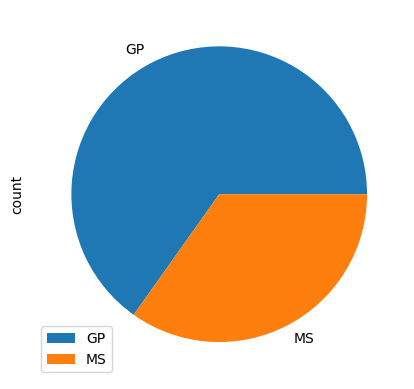

In [151]:
data["school"].value_counts().plot(kind="pie",legend=True)

<AxesSubplot:xlabel='sex'>

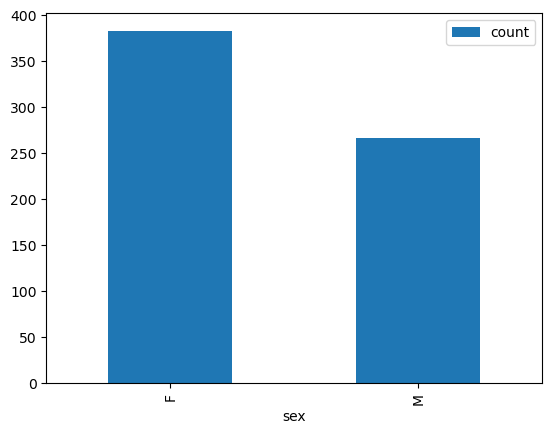

In [152]:
data["sex"].value_counts().plot(kind="bar",legend=True)

<AxesSubplot:xlabel='famsize'>

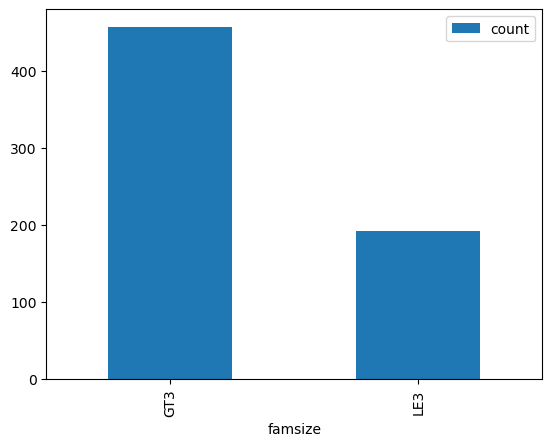

In [153]:
data["famsize"].value_counts().plot(kind="bar",legend=True)

<AxesSubplot:xlabel='sex'>

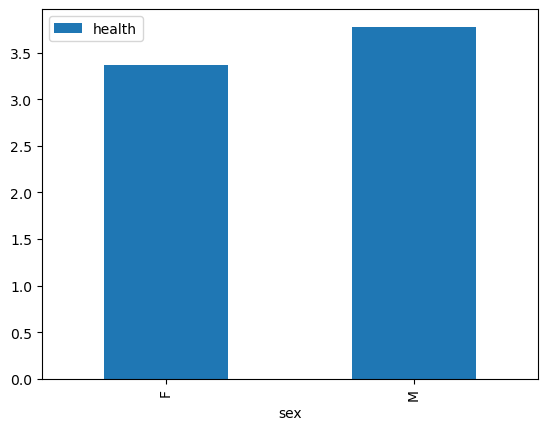

In [154]:
data.groupby(["sex"])["health"].mean().sort_values().plot(kind="bar",legend=True)

<AxesSubplot:ylabel='absences'>

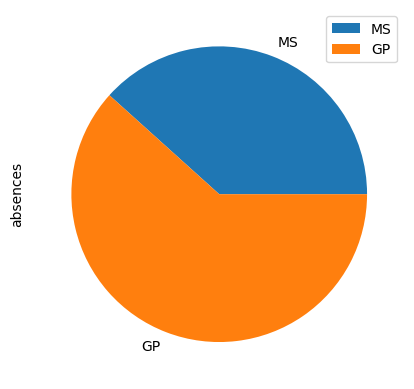

In [155]:
data.groupby(["school"])["absences"].mean().sort_values().plot(kind="pie",legend=True)

In [156]:
data["Pstatus"].value_counts()

Pstatus
T    569
A     80
Name: count, dtype: int64

In [157]:
data["Fjob"].value_counts()

Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64

<AxesSubplot:ylabel='Frequency'>

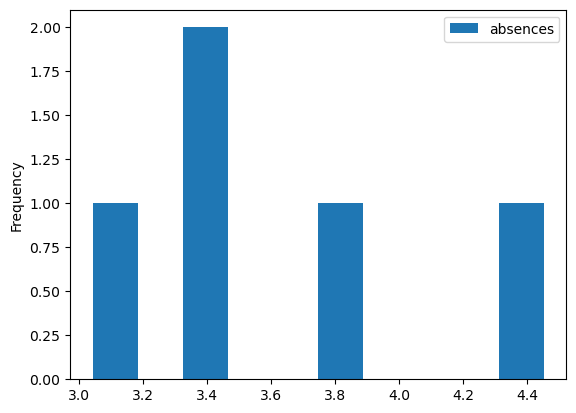

In [158]:
data.groupby(["Fjob"])["absences"].mean().plot(kind="hist",legend=True)

<AxesSubplot:ylabel='Pstatus'>

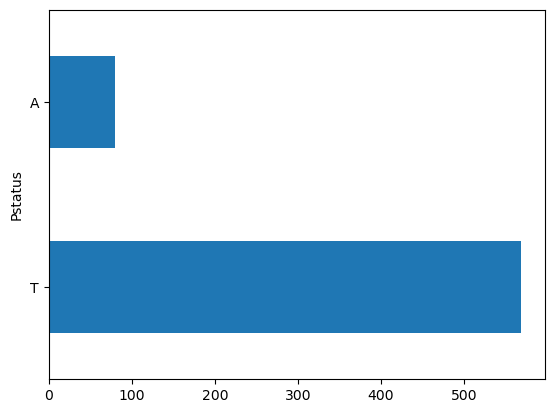

In [159]:
data["Pstatus"].value_counts().plot(kind="barh")

famrel
1    AxesSubplot(0.125,0.11;0.775x0.77)
2    AxesSubplot(0.125,0.11;0.775x0.77)
3    AxesSubplot(0.125,0.11;0.775x0.77)
4    AxesSubplot(0.125,0.11;0.775x0.77)
5    AxesSubplot(0.125,0.11;0.775x0.77)
Name: age, dtype: object

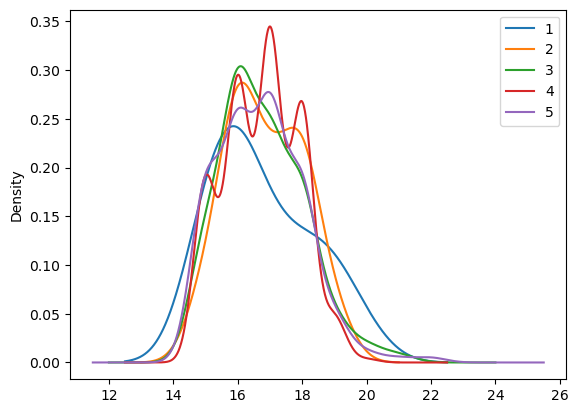

In [160]:
data.groupby(["famrel"])["age"].plot(kind="kde",legend=True)

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_13268\2690679224.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["age"],shade=True)
C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_13268\2690679224.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["freetime"],shade=True)
C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_13268\2690679224.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Fedu"],shade=True)
C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_13268\2690679224.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become

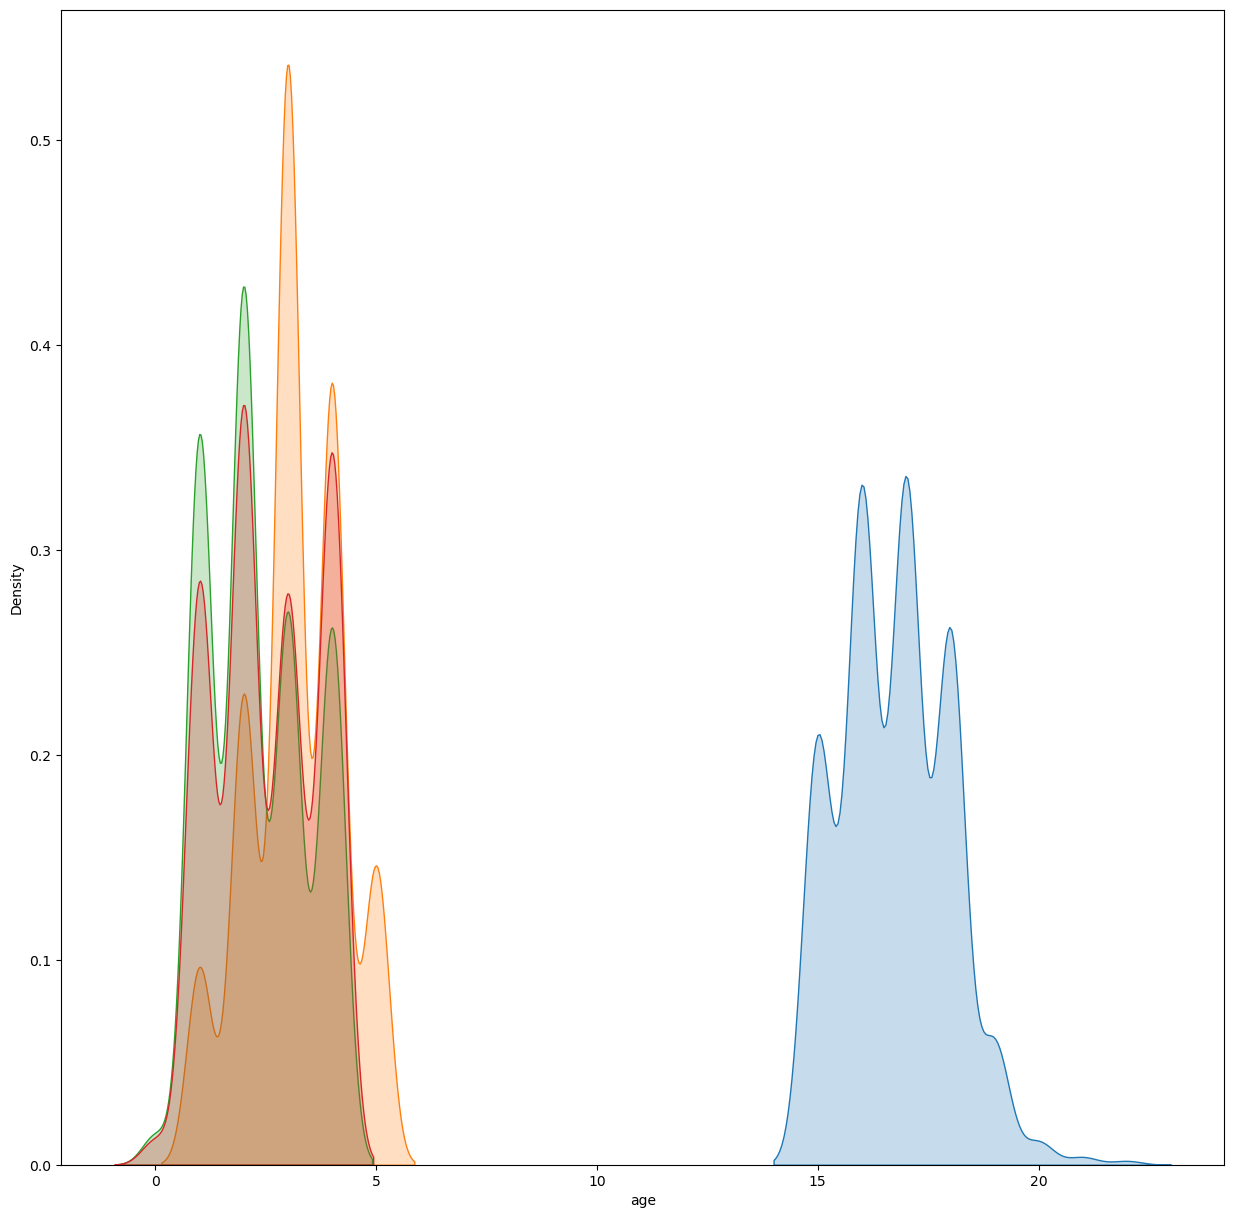

In [161]:
plt.figure(figsize=(15,15))
sns.kdeplot(data["age"],shade=True)
sns.kdeplot(data["freetime"],shade=True)
sns.kdeplot(data["Fedu"],shade=True)
sns.kdeplot(data["Medu"],shade=True)
plt.show()

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_13268\4080691779.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["goout"])


<AxesSubplot:xlabel='goout', ylabel='Density'>

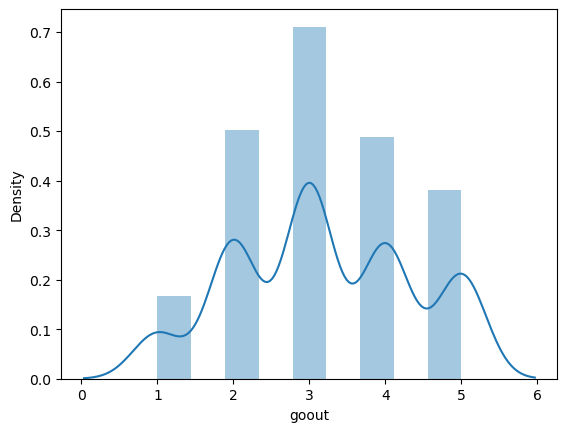

In [162]:
sns.distplot(data["goout"])

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_13268\3968466700.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["famrel"])


<AxesSubplot:xlabel='famrel', ylabel='Density'>

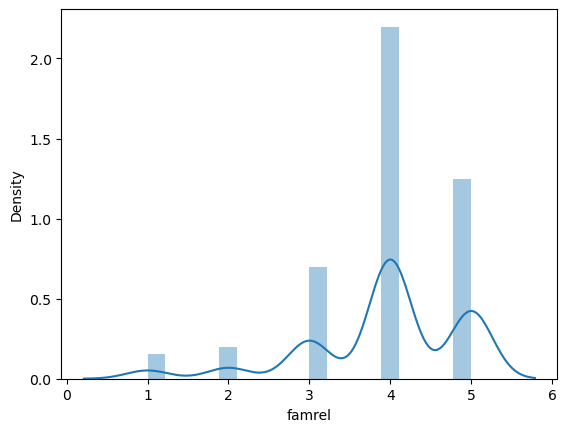

In [163]:
sns.distplot(data["famrel"])

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_13268\2662724227.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["famrel"])
C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_13268\2662724227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["goout"])


<AxesSubplot:xlabel='goout', ylabel='Density'>

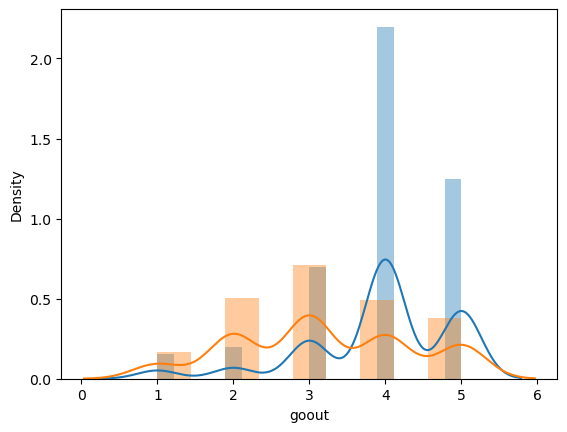

In [164]:
sns.distplot(data["famrel"])
sns.distplot(data["goout"])


<Figure size 10000x10000 with 0 Axes>

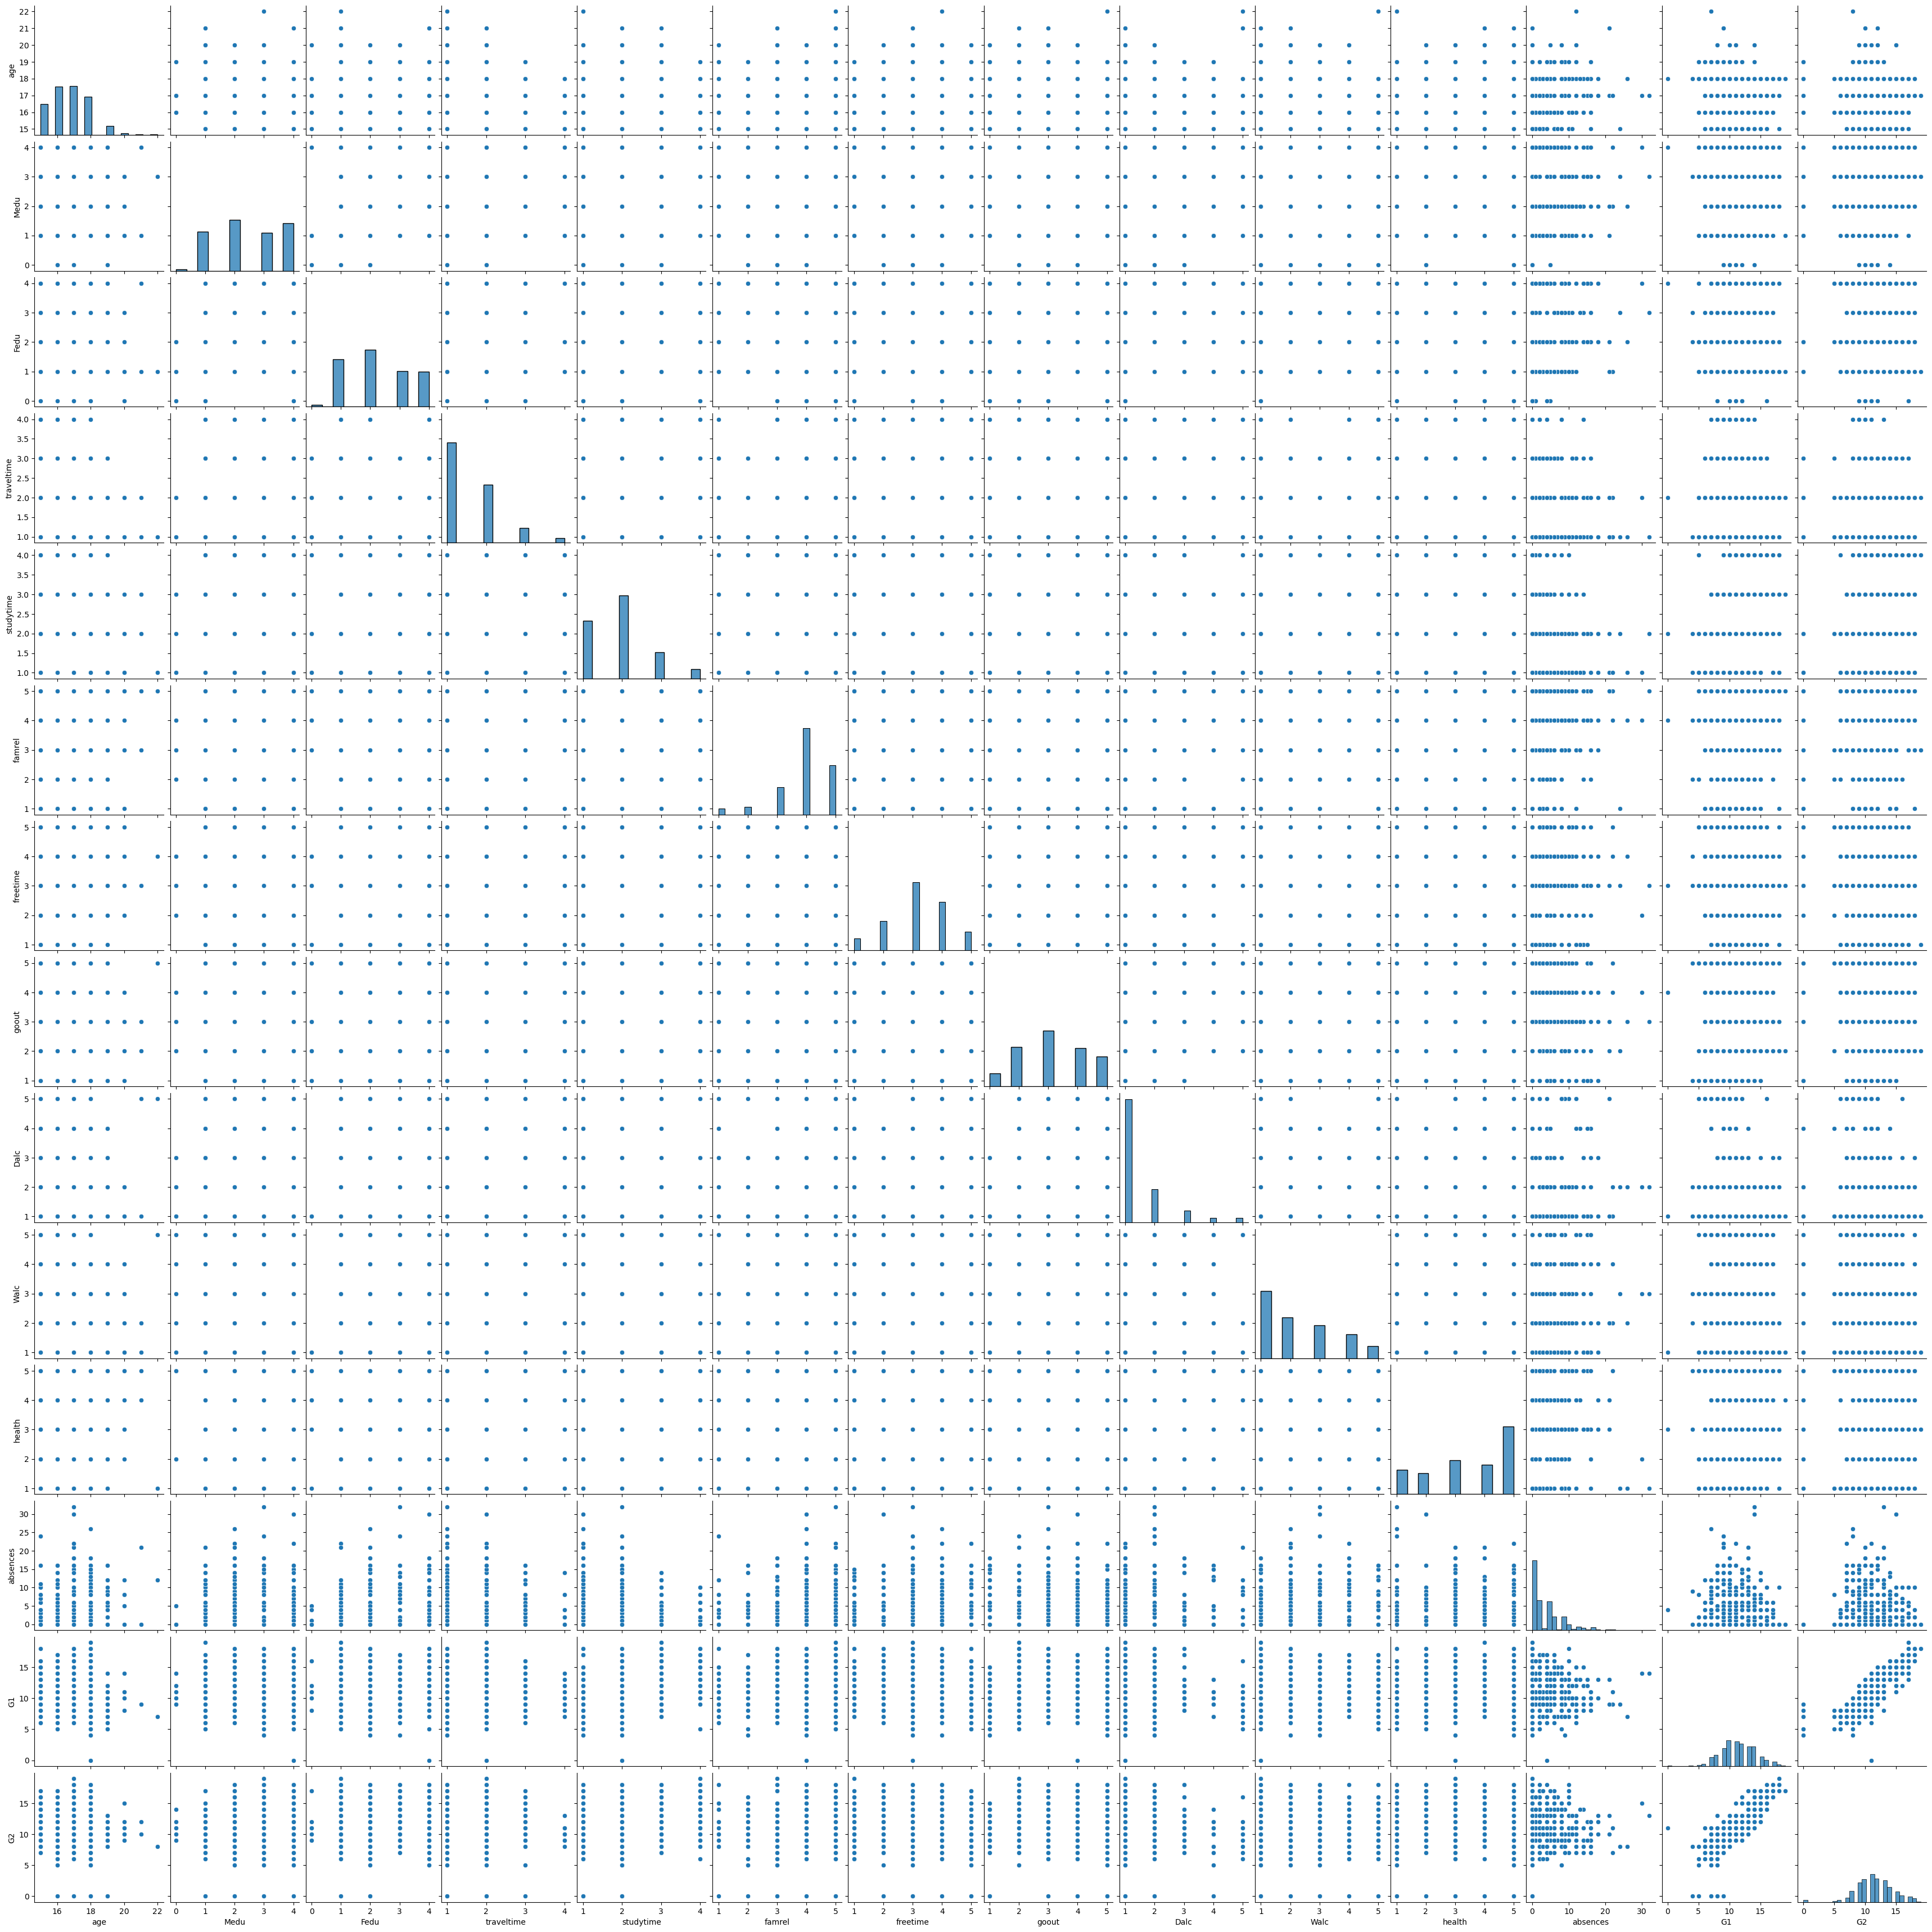

In [165]:
plt.figure(figsize=(100,100))
sns.pairplot(data.select_dtypes("number"))
plt.show()

In [166]:
# check the missing values & How Handle it:

data.isna().mean()

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
dtype: float64

In [167]:
# frpm the the last statistical step , we found that there Not any missing values:

In [168]:
data.describe(include=["O"])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


In [169]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000


In [170]:
Disc_data=data.select_dtypes(include=["int64"])
Disc_data

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,18,4,4,2,2,4,3,4,1,1,3,4,0,11
1,17,1,1,1,2,5,3,3,1,1,3,2,9,11
2,15,1,1,1,2,4,3,2,2,3,3,6,12,13
3,15,4,2,1,3,3,2,2,1,1,5,0,14,14
4,16,3,3,1,2,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,5,4,2,1,2,5,4,10,11
645,18,3,1,1,2,4,3,4,1,1,1,4,15,15
646,18,1,1,2,2,1,1,1,1,1,5,6,11,12
647,17,3,1,2,1,2,4,5,3,4,2,6,10,10


<AxesSubplot:xlabel='age'>

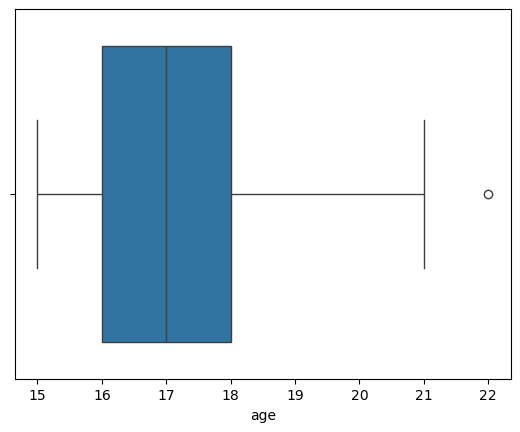

In [171]:
# check the outliers and handle it:

sns.boxplot(x=data["age"])


<AxesSubplot:xlabel='age'>

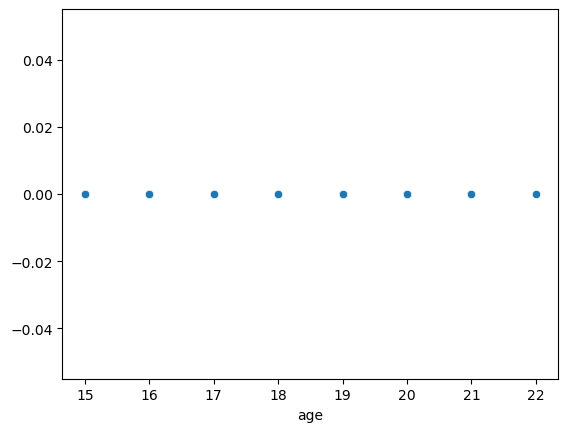

In [172]:
sns.scatterplot(x=data["age"],y=np.zeros_like(data["age"]))

In [173]:
# from the last we found taht there are outliers in age:
# calc the outlier in age:


q1_age,q3_age=data["age"].quantile([0.25,0.75])

iqr=q3_age-q1_age

low_limit_age=q1_age-1.5*iqr

upper_limit_age=q3_age+1.5*iqr

outliers=[]

for x in data["age"]:
    if( (x<low_limit_age) or (x>upper_limit_age)):
        outliers.append(x)
        
print("Number of outliers=",len(outliers))
print(f"value of q1_age={q1_age} and value of q3_age={q3_age}")
print(f"value of low_limit of age ={low_limit_age} and value of upper_limit of age ={upper_limit_age}")
print("outliers=",outliers)

Number of outliers= 1
value of q1_age=16.0 and value of q3_age=18.0
value of low_limit of age =13.0 and value of upper_limit of age =21.0
outliers= [22]


<AxesSubplot:xlabel='Medu'>

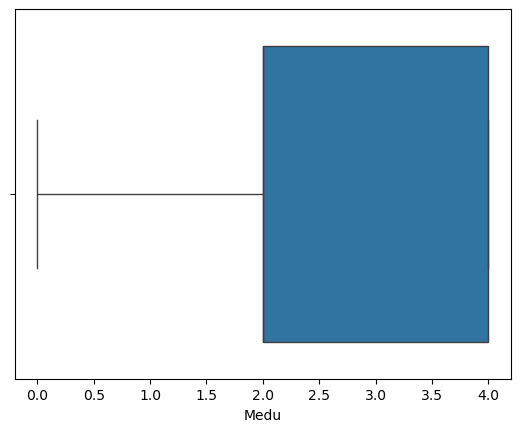

In [174]:
# check the outliers in Medu:

sns.boxplot(x=data["Medu"])

<AxesSubplot:xlabel='Medu'>

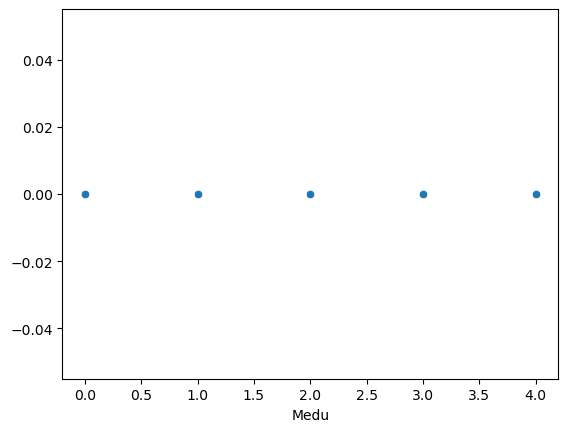

In [175]:
sns.scatterplot(x=data["Medu"],y=np.zeros_like(data["Medu"]))

In [176]:
# from the last we found taht there are  Not outliers in Medu:
# calc the outlier in medu:


q1_medu,q3_medu=data["Medu"].quantile([0.25,0.75])

iqr=q3_medu-q1_medu

low_limit_medu=q1_medu-1.5*iqr

upper_limit_medu=q3_medu+1.5*iqr

outliers=[]

for x in data["Medu"]:
    if( (x<low_limit_medu) or (x>upper_limit_medu)):
        outliers.append(x)
        
print("Number of outliers=",len(outliers))
print(f"value of q1_age={q1_medu} and value of q3_age={q3_medu}")
print(f"value of low_limit of age ={low_limit_medu} and value of upper_limit of age ={upper_limit_medu}")
print("outliers=",outliers)

Number of outliers= 0
value of q1_age=2.0 and value of q3_age=4.0
value of low_limit of age =-1.0 and value of upper_limit of age =7.0
outliers= []


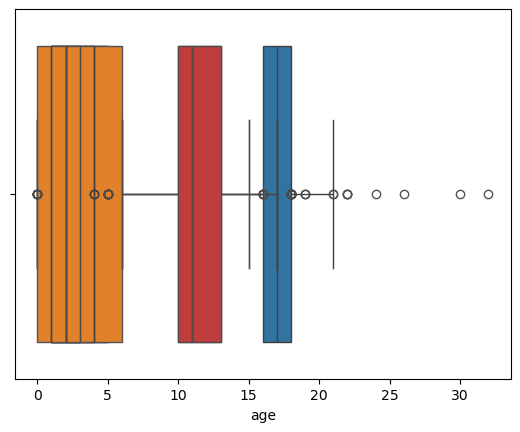

In [177]:
for x in Disc_data:
    sns.boxplot(x=data[x])

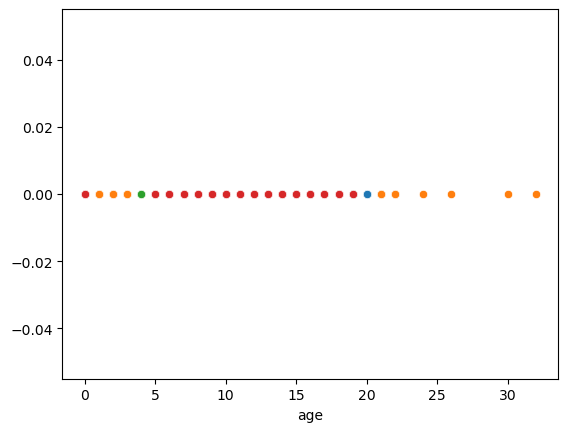

In [178]:
for x in Disc_data:
    sns.scatterplot(x=data[x],y=np.zeros_like(data[x]))

<AxesSubplot:xlabel='absences'>

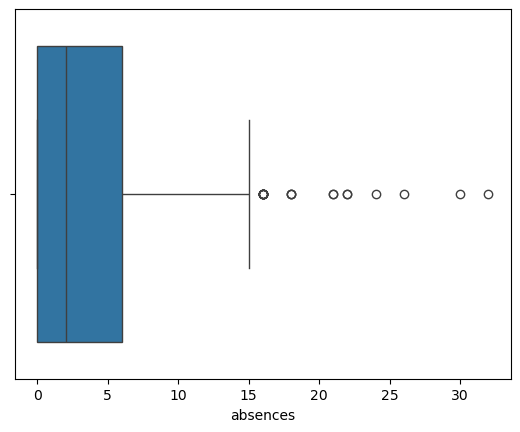

In [179]:
# check the outlier in absence:

sns.boxplot(x=data["absences"])

<AxesSubplot:xlabel='absences'>

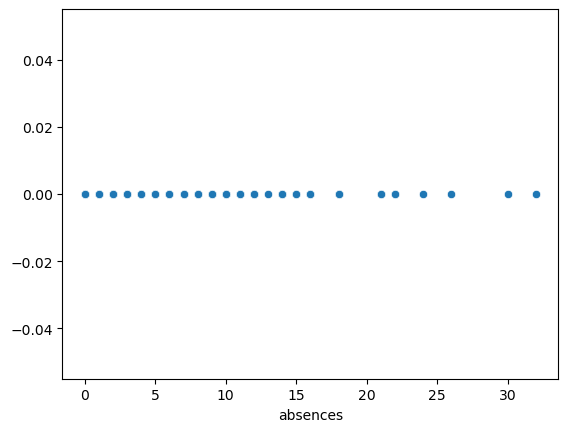

In [180]:
sns.scatterplot(x=data["absences"],y=np.zeros_like(data["absences"]))


In [181]:
# from the last vosualzation we found that thre outlier in abscence column:

q1,q3=data["absences"].quantile([0.25,0.75])

iqr=q3-q1

low_limit=q1-1.5*iqr

upper_limit=q3+1.5*iqr

outliers=[]

for x in data["absences"]:
    if( (x<low_limit) or (x>upper_limit)):
        outliers.append(x)
        
print("Number of outliers=",len(outliers))
print(f"value of q1_absences={q1} and value of q3_absences={q3}")
print(f"value of low_limit of absences ={low_limit} and value of upper_limit of absences ={upper_limit}")
print("outliers=",outliers)

Number of outliers= 21
value of q1_absences=0.0 and value of q3_absences=6.0
value of low_limit of absences =-9.0 and value of upper_limit of absences =15.0
outliers= [16, 16, 24, 22, 16, 32, 16, 16, 30, 21, 16, 18, 16, 26, 16, 16, 22, 18, 18, 16, 21]


In [182]:
# calc the variance with 2 ways:
# to know the dispration in the data:

data_var=data.select_dtypes("number").var()
data_var.sort_values(ascending=False)

absences      21.536642
G2             8.489290
G1             7.536481
health         2.091665
Walc           1.649632
age            1.483859
goout          1.382426
Medu           1.287208
Fedu           1.209848
freetime       1.104796
famrel         0.913395
Dalc           0.855319
studytime      0.688086
traveltime     0.560492
dtype: float64

In [183]:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


VarianceThreshold(threshold=0.01)

In [184]:
selector.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [185]:
Numeric_cols[selector.get_support(indices=True)]

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [186]:
# create transformer to remove high and low cardinality categorical or (low-high) varience:


from sklearn.base import BaseEstimator , TransformerMixin

class Var_Selector(BaseEstimator,TransformerMixin):
    
    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])
        
        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)
        
        # remove high-low cardinality categorical:-
        
        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index
        
        return data.drop(columns=removed_cols)
        

In [187]:
data.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11


In [188]:
transform=Var_Selector(data)
transform.fit(data)
transform.transform(data)

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,10,10


In [189]:
# removed the duplicate features :

df=data.T
duplicate_feature=df.duplicated().sum()
duplicate_feature

0

In [190]:
data.drop_duplicates()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,10,10


In [191]:
#calc the correlation with differnt ways:

a=data.select_dtypes("number").corr()
a

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480
Walc,0.086357,-0.019766,0.038445,0.057007,-0.214925,-0.093511,0.120244,0.388680,0.616561,1.000000,0.114988,0.156373,-0.155649,-0.164852


In [192]:
data.select_dtypes("number").corr(method="pearson")

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480
Walc,0.086357,-0.019766,0.038445,0.057007,-0.214925,-0.093511,0.120244,0.388680,0.616561,1.000000,0.114988,0.156373,-0.155649,-0.164852


In [193]:
data.select_dtypes("number").corr(method="spearman")

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
age,1.000000,-0.102288,-0.110211,0.067122,0.016959,-0.019374,-0.009869,0.130536,0.081319,0.094343,-0.018051,0.124260,-0.167373,-0.105595
Medu,-0.102288,1.000000,0.647194,-0.263289,0.098415,0.025087,-0.027895,0.010205,0.001961,-0.018234,0.016112,-0.006011,0.276400,0.285642
Fedu,-0.110211,0.647194,1.000000,-0.222034,0.069080,0.021284,-0.000151,0.028787,-0.004897,0.029726,0.046351,0.032025,0.234951,0.246285
traveltime,0.067122,-0.263289,-0.222034,1.000000,-0.089387,-0.025649,-0.001049,0.040714,0.068463,0.031517,-0.063844,0.022924,-0.166226,-0.166901
studytime,0.016959,0.098415,0.069080,-0.089387,1.000000,0.019370,-0.076496,-0.082318,-0.171309,-0.222088,-0.076732,-0.116945,0.271412,0.259252
famrel,-0.019374,0.025087,0.021284,-0.025649,0.019370,1.000000,0.144123,0.087775,-0.097529,-0.102033,0.092542,-0.103905,0.026310,0.058783
freetime,-0.009869,-0.027895,-0.000151,-0.001049,-0.076496,0.144123,1.000000,0.354345,0.127172,0.120148,0.095105,-0.028479,-0.105119,-0.120963
goout,0.130536,0.010205,0.028787,0.040714,-0.082318,0.087775,0.354345,1.000000,0.233977,0.372455,-0.012122,0.103874,-0.078216,-0.111697
Dalc,0.081319,0.001961,-0.004897,0.068463,-0.171309,-0.097529,0.127172,0.233977,1.000000,0.613056,0.084946,0.104280,-0.198476,-0.200592
Walc,0.094343,-0.018234,0.029726,0.031517,-0.222088,-0.102033,0.120148,0.372455,0.613056,1.000000,0.114282,0.145105,-0.157957,-0.169988


In [194]:
data.select_dtypes("number").corr(method="kendall")

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
age,1.000000,-0.084546,-0.091611,0.058240,0.014643,-0.016253,-0.007958,0.106809,0.070584,0.077979,-0.015027,0.098890,-0.127850,-0.078905
Medu,-0.084546,1.000000,0.569954,-0.230626,0.084420,0.021445,-0.023236,0.008406,0.002088,-0.015108,0.013076,-0.005538,0.218143,0.223391
Fedu,-0.091611,0.569954,1.000000,-0.195875,0.059178,0.018178,0.000058,0.023896,-0.004344,0.024809,0.037859,0.025516,0.185440,0.194609
traveltime,0.058240,-0.230626,-0.195875,1.000000,-0.080560,-0.023203,-0.000811,0.035189,0.063427,0.027722,-0.055419,0.019313,-0.136106,-0.137274
studytime,0.014643,0.084420,0.059178,-0.080560,1.000000,0.017213,-0.067493,-0.072043,-0.154685,-0.191925,-0.063964,-0.096322,0.218759,0.209136
famrel,-0.016253,0.021445,0.018178,-0.023203,0.017213,1.000000,0.123159,0.074582,-0.088159,-0.087238,0.079544,-0.085570,0.021556,0.047545
freetime,-0.007958,-0.023236,0.000058,-0.000811,-0.067493,0.123159,1.000000,0.303904,0.112806,0.100956,0.080489,-0.023003,-0.082367,-0.095371
goout,0.106809,0.008406,0.023896,0.035189,-0.072043,0.074582,0.303904,1.000000,0.205168,0.314907,-0.010109,0.083553,-0.060829,-0.087809
Dalc,0.070584,0.002088,-0.004344,0.063427,-0.154685,-0.088159,0.112806,0.205168,1.000000,0.555407,0.073551,0.087928,-0.164546,-0.165229
Walc,0.077979,-0.015108,0.024809,0.027722,-0.191925,-0.087238,0.100956,0.314907,0.555407,1.000000,0.093595,0.116612,-0.124218,-0.132474


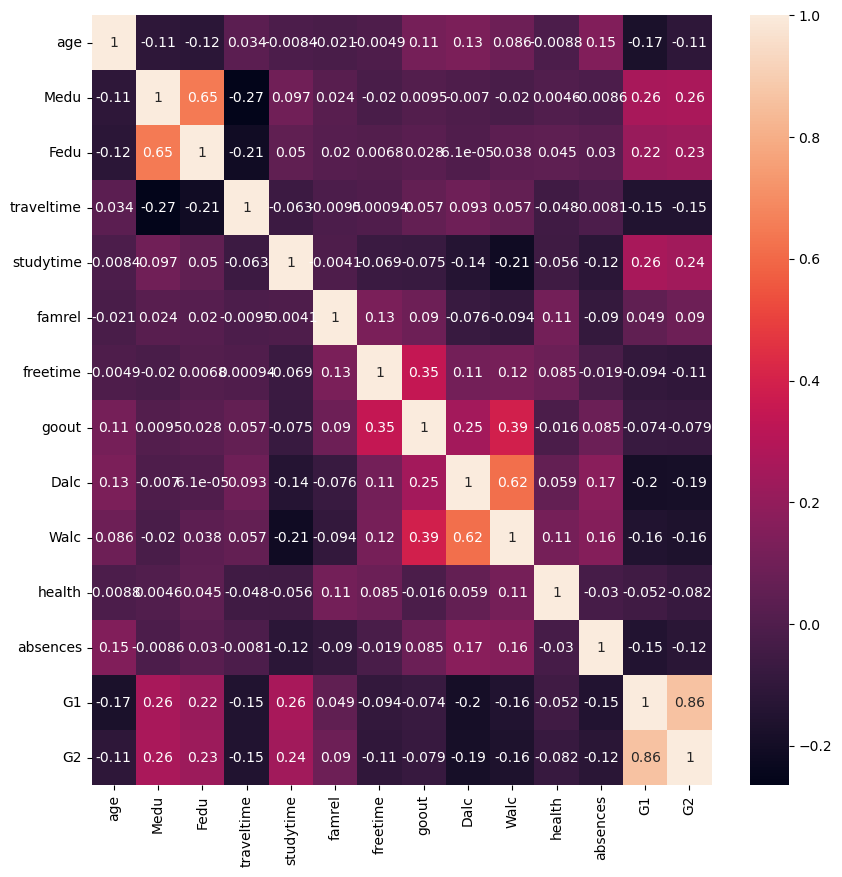

In [195]:
# plot the heatmap:

plt.figure(figsize=(10,10))
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt='.2g',linecolor='red')
plt.show()

In [196]:
#select the most 5 features correlation:

from sklearn.feature_selection import f_classif, SelectKBest

fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="G1").select_dtypes("number").fillna(0),data["G1"])

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


SelectKBest(k=5)

In [197]:
print(["{:10f}".format(p) for p in fs.pvalues_])
print(["{:10f}".format(p) for p in fs.scores_])

['  0.000003', '  0.000000', '  0.000018', '  0.020723', '  0.000000', '  0.489645', '  0.265178', '  0.841280', '  0.002036', '  0.023661', '  0.406993', '  0.130622', '  0.000000']
['  3.568149', '  4.667253', '  3.255419', '  1.867000', '  3.948532', '  0.968773', '  1.196491', '  0.652211', '  2.360817', '  1.836728', '  1.044323', '  1.409552', '136.487803']


In [198]:
features_pvalues=pd.DataFrame(fs.pvalues_)
fatures_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="G1").select_dtypes("number").fillna(0).columns)

In [199]:
feature_score=pd.concat([features_pvalues,fatures_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

,pvalues,score,input
0,3.226583e-06,3.568149,age
1,5.767826e-09,4.667253,Medu
2,1.838215e-05,3.255419,Fedu
3,2.072259e-02,1.867000,traveltime
4,3.725173e-07,3.948532,studytime
5,4.896447e-01,0.968773,famrel
6,2.651777e-01,1.196491,freetime
7,8.412796e-01,0.652211,goout
8,2.036252e-03,2.360817,Dalc
9,2.366069e-02,1.836728,Walc


In [200]:
# Another way fo select the most 5 features(Entrop way):

from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(data.drop(columns="G1").select_dtypes("number").fillna(0),data["G1"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="G1").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


famrel        0.000000
freetime      0.000000
goout         0.015294
traveltime    0.018088
health        0.020942
Medu          0.027330
Walc          0.033473
Dalc          0.039756
studytime     0.053431
age           0.055208
Fedu          0.057134
absences      0.076795
G2            0.843141
dtype: float64

In [201]:
# Convert the objected data into numerical:

label_encoder=LabelEncoder()
for i in data:
    data[i]=label_encoder.fit_transform(data[i])
    
data    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,3,1,0,0,4,4,0,4,...,0,3,2,3,0,0,2,4,0,7
1,0,0,2,1,0,1,1,1,0,2,...,0,4,2,2,0,0,2,2,6,7
2,0,0,0,1,1,1,1,1,0,2,...,0,3,2,1,1,2,2,6,9,9
3,0,0,0,1,0,1,4,2,1,3,...,1,2,1,1,0,0,4,0,11,10
4,0,0,1,1,0,1,3,3,2,2,...,0,3,2,1,0,1,4,0,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,4,0,0,1,2,3,3,2,...,0,4,3,1,0,1,4,4,7,7
645,1,0,3,1,1,1,3,1,4,3,...,0,3,2,3,0,0,0,4,12,11
646,1,0,3,1,0,1,1,1,2,2,...,0,0,0,0,0,0,4,6,8,8
647,1,1,2,1,1,1,3,1,3,3,...,0,1,3,4,2,3,1,6,7,6


In [202]:
# Devide the data:
x=data.drop("G1",axis=1)
y=data["G1"]

In [215]:
# train_test_split:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G2
201,0,1,1,1,1,1,2,1,2,2,...,1,1,3,1,2,0,1,4,0,10
115,0,1,1,1,0,1,4,4,4,4,...,1,0,4,3,3,0,1,4,6,10
210,0,1,2,1,0,1,4,4,3,4,...,1,0,4,1,2,0,1,4,4,9
487,1,0,3,0,1,0,3,2,2,2,...,0,1,2,2,1,0,0,1,6,5
624,1,0,2,0,0,1,1,1,2,3,...,1,1,4,1,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,1,0,1,0,0,1,1,2,2,2,...,1,1,3,2,3,0,0,2,5,10
502,1,1,2,0,1,1,2,2,3,3,...,0,0,0,2,4,2,4,2,2,4
312,0,0,3,1,0,1,2,3,2,3,...,1,1,3,4,4,0,2,1,10,12
239,0,0,3,0,0,1,3,1,2,2,...,1,1,4,2,2,0,0,3,4,4


In [216]:
# create the model:
model=RandomForestClassifier()
model


RandomForestClassifier()

In [217]:
model.fit(x_train,y_train)

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


RandomForestClassifier()

In [218]:
y_predict=model.predict(x_test)
y_predict[:10]

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


array([ 6,  6, 10,  7,  7,  7, 15,  6,  9,  8], dtype=int64)

In [219]:
print(f"accuracy --->>>{model.score(x_test,y_test)*100:0.2f}%")

accuracy --->>>26.67%


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [ ]:
# the End